In [23]:
from pytorch_tabnet.tab_model import TabNetClassifier
import pandas as pd
from matplotlib import pyplot as plt
import torch
import numpy as np

In [24]:
A = np.load('../../Utils/penalty_matrix.npy')

In [25]:
def score(y_test, y_pred):
    S = 0.0
    for i in range(0, y_test.shape[0]):
        S -= A[y_test[i], y_pred[i]]
    return S/y_test.shape[0]

In [26]:
x = pd.read_csv('../../Data/Missing_0_Mask/X_train_0.csv').to_numpy()
y = pd.read_csv('../../Data/Y_train.csv').to_numpy().reshape(-1)
xt = pd.read_csv('../../Data/Missing_0_Mask/X_test_0.csv').to_numpy()
yt = pd.read_csv('../../Data/Y_test.csv').to_numpy().reshape(-1)
xht = pd.read_csv('../../Data/Missing_0_Mask/X_hidden_0.csv').to_numpy()
yht = pd.read_csv('../../Data/Y_hidden.csv').to_numpy().reshape(-1)

In [27]:
x.shape

(1170511, 26)

In [28]:
# 3- F1 Score - Unbalanced
n_d = 8+47
n_a = n_d
n_steps=3+1
lr=0.01
gamma=1+0.7399990400995684
n_independent=1+1
n_shared =1+1
momentum=0.34076354946098486

clf2 = TabNetClassifier(n_d =n_d, n_a = n_d, n_steps=n_steps,  cat_idxs = [24,25], optimizer_params=dict(lr=lr), gamma=1+gamma, n_independent=n_independent, n_shared = n_shared, momentum= momentum)
clf2.fit(x,y, eval_set=[(x,y),(xt, yt)], max_epochs = 100)  

Device used : cuda
epoch 0  | loss: 0.77011 | val_0_accuracy: 0.78105 | val_1_accuracy: 0.69955 |  0:00:57s
epoch 1  | loss: 0.60364 | val_0_accuracy: 0.81183 | val_1_accuracy: 0.72423 |  0:01:56s
epoch 2  | loss: 0.52842 | val_0_accuracy: 0.83693 | val_1_accuracy: 0.75113 |  0:02:53s
epoch 3  | loss: 0.46264 | val_0_accuracy: 0.85164 | val_1_accuracy: 0.7637  |  0:03:50s
epoch 4  | loss: 0.42765 | val_0_accuracy: 0.85754 | val_1_accuracy: 0.75859 |  0:04:47s
epoch 5  | loss: 0.40564 | val_0_accuracy: 0.87155 | val_1_accuracy: 0.75019 |  0:05:44s
epoch 6  | loss: 0.40552 | val_0_accuracy: 0.85772 | val_1_accuracy: 0.75393 |  0:06:42s
epoch 7  | loss: 0.40535 | val_0_accuracy: 0.86869 | val_1_accuracy: 0.76166 |  0:07:39s
epoch 8  | loss: 0.37346 | val_0_accuracy: 0.88083 | val_1_accuracy: 0.76222 |  0:08:36s
epoch 9  | loss: 0.36495 | val_0_accuracy: 0.87845 | val_1_accuracy: 0.76784 |  0:09:33s
epoch 10 | loss: 0.34578 | val_0_accuracy: 0.87927 | val_1_accuracy: 0.77788 |  0:10:30s
ep

In [ ]:
saving_path_name = "./tabnet_model_test_1"
saved_filepath = clf2.save_model(saving_path_name)

In [6]:
n_d = 8+47
n_a = n_d
n_steps=3+1
lr=0.01
gamma=1+0.7399990400995684
n_independent=1+1
n_shared =1+1
momentum=0.34076354946098486

clf2 = TabNetClassifier(n_d =n_d, n_a = n_d, n_steps=n_steps,  cat_idxs = [24,25], optimizer_params=dict(lr=lr), gamma=1+gamma, n_independent=n_independent, n_shared = n_shared, momentum= momentum)
clf2.load_model('tabnet_model_test_1.zip')

Device used : cuda
Device used : cuda


In [7]:
# Training Accuracy
pred = clf2.predict(x)
np.mean(y == pred)

0.8792749491461421

In [8]:
# Training Score
score(y, pred)

-0.3135305862140552

In [9]:
# Test Accuracy
predt = clf2.predict(xt)
np.mean(yt == predt)

0.7778793151345897

In [10]:
# Test Score
score(yt, predt)

-0.581412754229234

In [11]:
# Hidden Accuracy
pred = clf2.predict(x)
np.mean(y == pred)

0.8792749491461421

In [12]:
# Hidden Score
score(y, pred)

-0.3135305862140552

In [17]:
labels = ['DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'CALI', 'RSHA', 'RMED', 'RDEP',
       'RHOB', 'GR', 'SGR', 'NPHI', 'PEF', 'DTC', 'SP', 'BS', 'ROP', 'DTS',
       'DCAL', 'DRHO', 'MUDWEIGHT', 'RMIC', 'ROPA', 'RXO', 'GROUP',
       'FORMATION']

Text(0, 0.5, 'Importance')

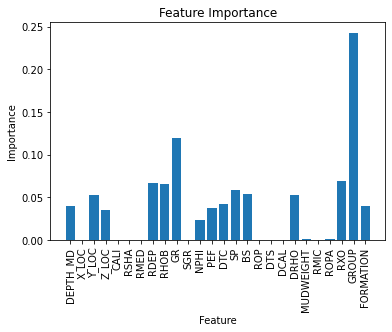

In [30]:
# Feature Imporatnce
plt.bar(labels, clf2.feature_importances_)
plt.xticks(rotation='vertical')
plt.title('Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')

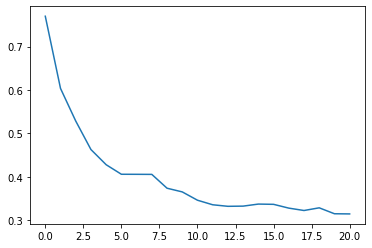

In [10]:
plt.plot(clf2.history['loss'])

Text(0, 0.5, 'Accuracy')

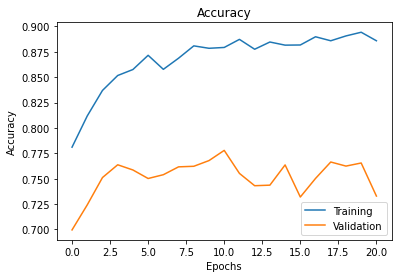

In [34]:
plt.plot(clf2.history['val_0_accuracy'])
plt.plot(clf2.history['val_1_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')